In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Read Dataset

In [ ]:
shoppers_df = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Online%20Shoppers%20Intention.csv")
shoppers_df.head()

##### Data Description

    * Administrative - This is number of pages of this type(administrative) that user visited.
    * Administrative_Duration - Duration spent in this category of pages.
    * Informational - Number of pages of this type (informational) that the user visited
    * Informational_Duration - Duration spent in this category of pages.
    * ProductRelated - Number of pages of this type (product related) that the user visited
    * ProductRelated_Duration	- Duration spent in this category of pages
    * BounceRates - Percentage of visitors who enter the website through that page and exit without triggering any additional tasks
    * ExitRates - percentage of pageviews on the website that end at that specific page
    * PageValues - Average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction
    * SpecialDay - Special days or holidays like valetine's day or mother's day etc.
    * Month	-
    * OperatingSystems -
    * Browser	-
    * Region -
    * TrafficType - Direct, Referal, Organic, Social Traffic
    * VisitorType	-
    * Weekend -
    * Revenue - Target Label

##### Data Wrangling
Handling Missing Data

In [ ]:
shoppers_df.isnull().sum()

In [ ]:
shoppers_df.shape

(12330, 18)

In [ ]:
shoppers_df.dropna(inplace = True)

##### Is there Imbalanced Class ?

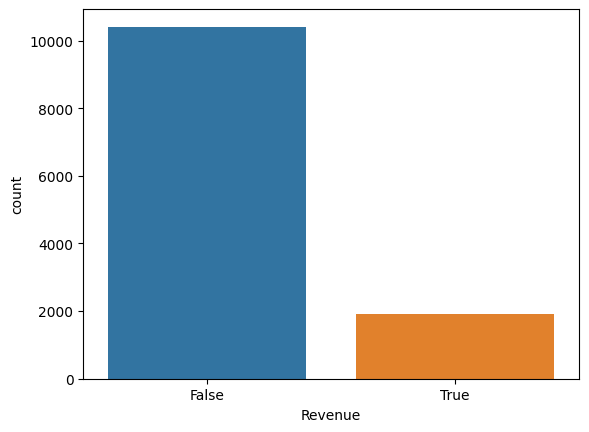

In [ ]:
sns.countplot(x = 'Revenue', data = shoppers_df)
plt.show()

In [ ]:
shoppers_df['Revenue'].value_counts()

False    10408
True      1908
Name: Revenue, dtype: int64

##### How to solve Imbalanced Label ?

In [ ]:
df_0 = shoppers_df[shoppers_df['Revenue'] == False]
df_1 = shoppers_df[shoppers_df['Revenue'] == True]

In [ ]:
from sklearn.utils import resample
df_1_upsample = resample(df_1, n_samples = 5000, replace = True, random_state = 123)

In [ ]:
shoppers_df1 = pd.concat([df_0, df_1_upsample])

##### Data Pre-Processing

In [ ]:
shoppers_df1['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [ ]:
shoppers_df1['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Aug', 'Nov', 'Jul', 'Sep',
       'Dec'], dtype=object)

In [ ]:
# label encoder is used in ordinal or two categical values for given column
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
le_encoder.fit(shoppers_df1['Month'])
shoppers_df1['Month'] = le_encoder.transform(shoppers_df1['Month'])

In [ ]:
# One Hot Encoding
visitor_df = pd.get_dummies(shoppers_df1['VisitorType'])
visitor_df

In [ ]:
shoppers_df2 = pd.concat([shoppers_df1, visitor_df], axis = 1)

##### Is there multi-collinearity ?

<ipython-input-29-88140b9f85cc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(shoppers_df2.corr(), annot = True, cmap = 'RdYlGn')


<Axes: >

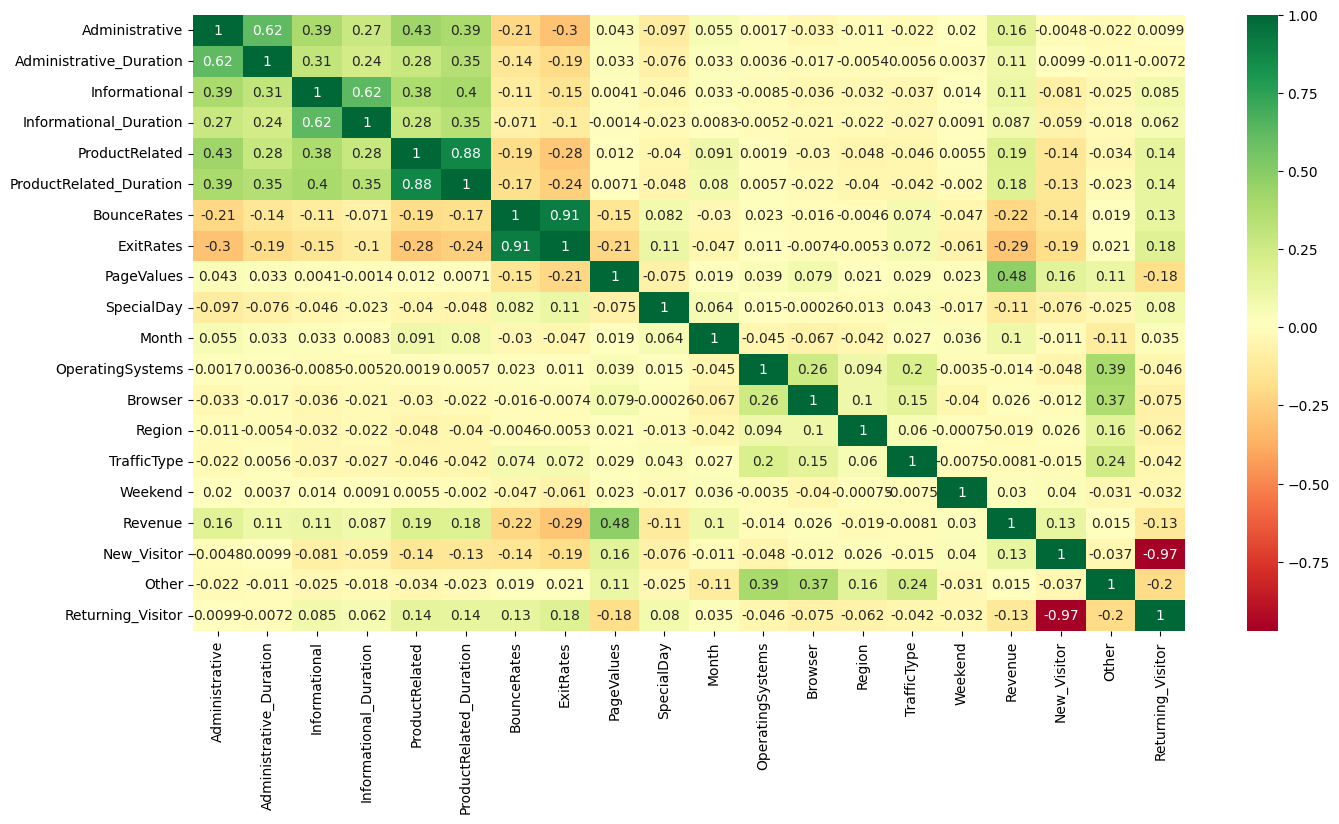

In [ ]:
plt.figure(figsize = (16,8))
sns.heatmap(shoppers_df2.corr(), annot = True, cmap = 'RdYlGn')

##### Features & Target

In [ ]:
shoppers_df2.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'New_Visitor', 'Other', 'Returning_Visitor'],
      dtype='object')

In [ ]:
X = shoppers_df2.drop(['VisitorType','ProductRelated_Duration','BounceRates','New_Visitor',
                   'Revenue'], axis = 1)
Y = shoppers_df2['Revenue']

##### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 8)

##### Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
bern_NB = BernoulliNB()

In [ ]:
bern_NB.fit(x_train, y_train)

BernoulliNB()

In [ ]:
bern_NB.score(x_test, y_test)

0.8296560674886437